__Curso: Ciências de Dados
    <br>
Escola: Digital House SP__
    <br>
Integrantes:
    <br>
- Gleisson Bispo
- Lorena Corina
- Marcos Azevedo
- Maxwell G Marcos
- Rodrigo Pasqualucci

# Projeto Integrador 

## Introdução:


__Tema: A Inclusão Digital nas Escolas Públicas Brasileiras__

Este trabalho se valerá de ferramentas de ciências de dados para explorar os acessos digitais nas escolas públicas e suas implicações na vida escolar dos alunos.

Entre essas ferramentas podemos destacar o pacote SHAP, modelos de predição e gráficos GEOPandas.

Fonte de dados: 

- Programa Banda Larga nas Escolas - http://dados.gov.br/dataset/pble
- Micro Dados da Educação - http://portal.inep.gov.br/microdados


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from datetime import date
%matplotlib notebook

%matplotlib inline


# Importando os arquivos

### Banda larga nas escolas 

In [2]:
df = pd.read_csv('./Data/PBLE1.csv', delimiter=';', encoding='latin1', dtype={'CD_GEOCUF':object, 'CD_GEOCMU':object})

### Latitude e Longitudes para UF e Municípios

In [3]:
df_uf = gpd.read_file('./Data/br_unidades_da_federacao/BRUFE250GC_SIR.shx')

In [4]:
df_mun = gpd.read_file('./Data/br_municipios/BRMUE250GC_SIR.shx')

# Explorando o primeiro arquivo - Programa Banda Larga nas Escolas

In [5]:
df.head()

,Prestadora,Num_INEP,UF,Municipio,Situacao,Tipo_Obrigacao,Velocidade_Acesso_Instalada,Tipo_velocidade,Tecnologia,Nome_Escola,Tipo_Escola,Data_Ativacao,Mes,Ano,Longitude,Latitude,CD_GEOCUF,CD_GEOCMU
0,CTBC,31118818,MG,Patos de Minas,Instalada,PBLE,6.0,Mbps,ADSL,EE ABILIO CAIXETA DE QUEIROZ,Estadual,08/05/2013 00:00,3,2019,-46.51,-18.59,31,3148004
1,CTBC,31118834,MG,Patos de Minas,Instalada,PBLE,4.0,Mbps,ADSL,EE ILIDIO CAIXETA DE MELO,Estadual,24/09/2015 00:00,3,2019,-46.51,-18.59,31,3148004
2,CTBC,31118842,MG,Patos de Minas,Instalada,PBLE,40.0,Mbps,Fibra - FTTx,EE CONEGO GETULIO,Estadual,22/03/2011 00:00,3,2019,-46.51,-18.59,31,3148004
3,CTBC,31118851,MG,Patos de Minas,Instalada,PBLE,4.0,Mbps,ADSL,CESEC ORDALINA VIEIRA RORIZ DA COSTA,Federal,18/03/2010 00:00,3,2019,-46.51,-18.59,31,3148004
4,CTBC,31118869,MG,Patos de Minas,Instalada,PBLE,6.0,Mbps,ADSL,EE CORONEL OSORIO MACIEL,Estadual,22/03/2011 00:00,3,2019,-46.51,-18.59,31,3148004


In [6]:
df.dtypes

Prestadora                      object
Num_INEP                        object
UF                              object
Municipio                       object
Situacao                        object
Tipo_Obrigacao                  object
Velocidade_Acesso_Instalada    float64
Tipo_velocidade                 object
Tecnologia                      object
Nome_Escola                     object
Tipo_Escola                     object
Data_Ativacao                   object
Mes                              int64
Ano                              int64
Longitude                      float64
Latitude                       float64
CD_GEOCUF                       object
CD_GEOCMU                       object
dtype: object

In [7]:
df.isnull().sum()

Prestadora                     0
Num_INEP                       0
UF                             0
Municipio                      0
Situacao                       0
Tipo_Obrigacao                 0
Velocidade_Acesso_Instalada    0
Tipo_velocidade                0
Tecnologia                     0
Nome_Escola                    0
Tipo_Escola                    0
Data_Ativacao                  0
Mes                            0
Ano                            0
Longitude                      0
Latitude                       0
CD_GEOCUF                      0
CD_GEOCMU                      0
dtype: int64

# Plotando 

In [8]:
df['Tecnologia'].value_counts()

ADSL                     59420
SATÉLITE                  2137
LP                        2035
Rede Celular               432
HDSL                       426
RÁDIO                      103
Fibra - Ponto a ponto       75
Fibra - FTTx                54
DEDICADO                    10
Name: Tecnologia, dtype: int64

### Segmentando as tecnologias para melhor visualização: ADSL (maior volume) e Demais tecnologias.

In [9]:
round(df['Velocidade_Acesso_Instalada']).value_counts()

2.0      36391
5.0      11212
10.0      9418
4.0       3022
15.0      2440
8.0        990
1.0        897
6.0        104
3.0         76
20.0        56
25.0        23
12.0        18
40.0        12
0.0          9
512.0        9
7.0          5
50.0         2
11.0         2
13.0         2
9.0          2
16.0         1
17.0         1
Name: Velocidade_Acesso_Instalada, dtype: int64

Há um erro na velocidade 512,00, o correto é 0,512. Necessário corrigir para evitar distorções.

In [10]:
df['Velocidade_Acesso_Instalada']= df['Velocidade_Acesso_Instalada'].replace(512.000, 0.512)
  #alterando de a velocidade errada

In [12]:
round(df['Velocidade_Acesso_Instalada']).value_counts()

2.0     36391
5.0     11212
10.0     9418
4.0      3022
15.0     2440
8.0       990
1.0       906
6.0       104
3.0        76
20.0       56
25.0       23
12.0       18
40.0       12
0.0         9
7.0         5
50.0        2
11.0        2
9.0         2
13.0        2
16.0        1
17.0        1
Name: Velocidade_Acesso_Instalada, dtype: int64

#### ADSL

In [13]:
ADSL = df[df['Tecnologia'] == 'ADSL']

In [14]:
ADSL['Velocidade_Acesso_Instalada'].value_counts()

2.000     31769
5.000     11064
10.000     9418
4.000      2809
15.000     2439
8.000       945
1.000       737
6.000       102
0.512        73
25.000       23
12.000       17
40.000       10
0.256         8
20.000        3
50.000        2
3.000         1
Name: Velocidade_Acesso_Instalada, dtype: int64

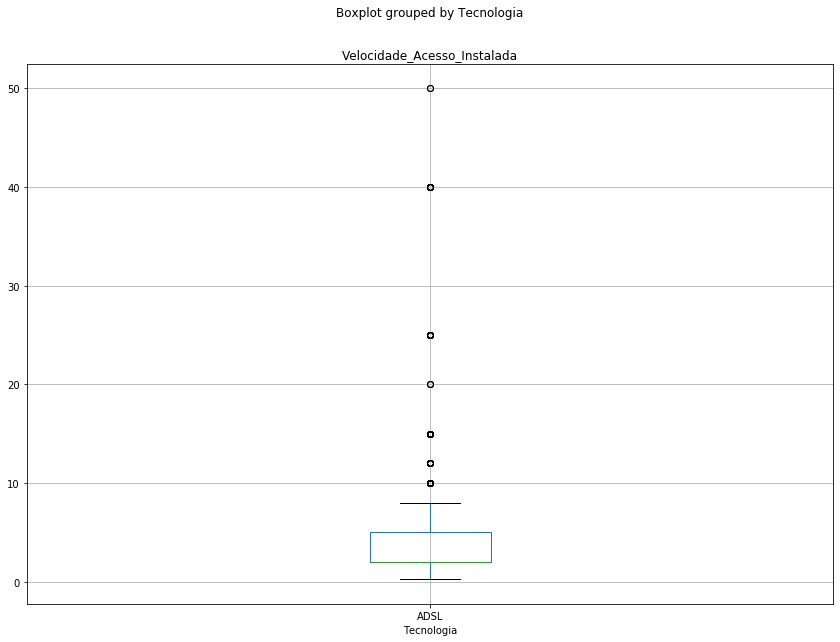

In [16]:
rcParams['figure.figsize'] = 14,10
ADSL.boxplot(column='Velocidade_Acesso_Instalada', by='Tecnologia')

__Observação: A velocidade para a tecnologia ADSL tem sua maior concetração abaixo de 10 Mbps, de acordo com o gráfico acima, chegando até 50 Mbps com alguns outliers.__

#### Demais tecnologias

In [17]:
DEMAIS = df[df['Tecnologia'] != 'ADSL']
DEMAIS.shape

(5272, 18)

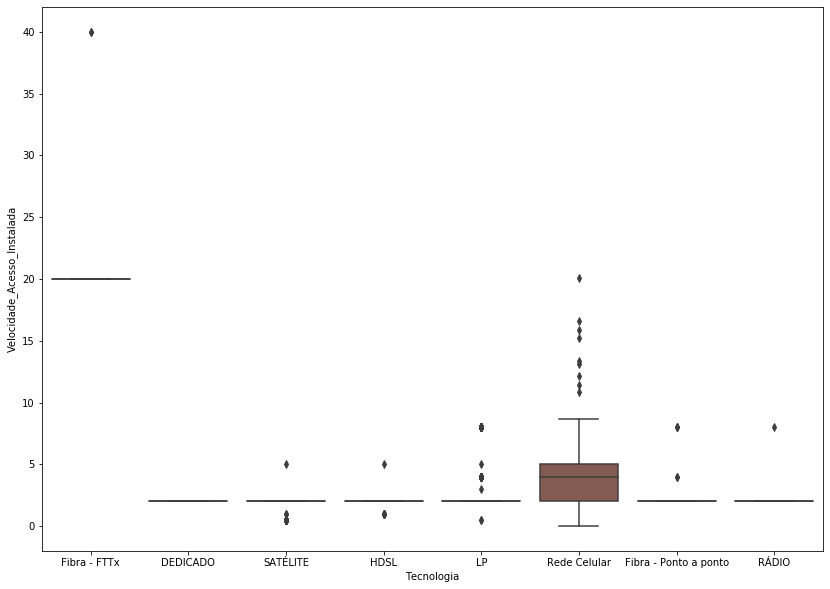

In [18]:
plot_d = sns.boxplot(y='Velocidade_Acesso_Instalada', x='Tecnologia', data=DEMAIS)

__Observações:__
<br>
- A tecnologia FIBRA FTTX tem a maior velocidade mas um volume baixo de instalações.
- A tecnologia REDE CELULAR não tem o maior volume instalado, 432 escolas,  mas tem mais distribuição nas velocidades.
- AS tecnologias com mais instalações são a SATÉLITE (2137 escolas) e a LP (2035 escolas).

# Plotando Mapas

In [19]:
df_map_ufs = df[['CD_GEOCUF', 'UF', 'Nome_Escola']].groupby('CD_GEOCUF').count()

In [20]:
df_plot_uf = pd.merge(df_uf[['CD_GEOCUF', 'geometry']], df_map_ufs, on='CD_GEOCUF', how='inner')

In [21]:
df_plot_uf.head()

,CD_GEOCUF,geometry,UF,Nome_Escola
0,28,(POLYGON ((-37.98248472599994 -11.348177102999...,749,749
1,21,(POLYGON ((-44.48154809099998 -2.7265963579999...,2929,2929
2,32,(POLYGON ((-29.33711335999993 -20.488018701999...,1256,1256
3,13,POLYGON ((-69.61341148599996 -2.44024888899997...,1036,1036
4,14,POLYGON ((-63.97805159899997 2.467536102000054...,197,197


### Distribuição nos Estados das Escolas Públicas com Wi-Fi

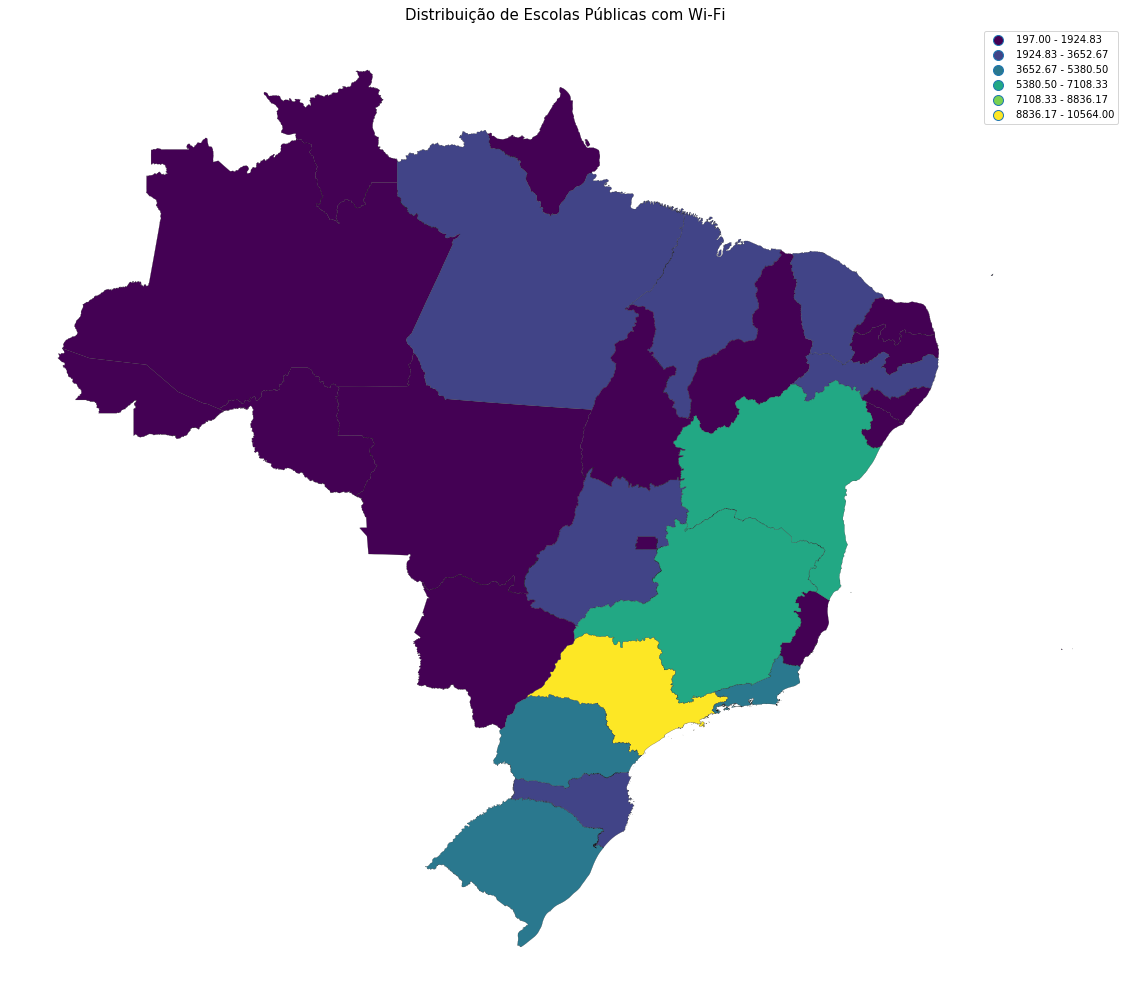

In [22]:
ax = df_plot_uf.plot(column='UF', 
                         cmap=plt.cm.get_cmap('viridis', 6), 
                         figsize=(20, 20),
                         scheme='equal_interval',
                         linewidth=0.2, 
                         edgecolor='.1',
                         k=6,
                         legend=True)
ax.axis('off')
ax.set_title("Distribuição de Escolas Públicas com Wi-Fi", 
             fontdict={'fontsize': '15', 'fontweight' : '10'}, 
             loc='center');

In [23]:
df_map_cidades = df[['CD_GEOCMU', 'Municipio', 'Nome_Escola']].groupby('CD_GEOCMU').count()

In [24]:
df_plot = pd.merge(df_mun[['CD_GEOCMU', 'geometry']], df_map_cidades, on='CD_GEOCMU', how='inner')

In [25]:
df_plot.head()

,CD_GEOCMU,geometry,Municipio,Nome_Escola
0,1501956,POLYGON ((-46.31955231999996 -1.75517617399992...,6,6
1,2111250,POLYGON ((-44.63409231599996 -5.03497527499996...,4,4
2,5201454,POLYGON ((-51.14229517499996 -18.2967249689999...,2,2
3,5202353,POLYGON ((-51.69953044199997 -16.2326965739999...,3,3
4,1502855,POLYGON ((-55.17192719299993 -1.83330502899997...,1,1


### Distribuição nos Municípios das Escolas Públicas com Wi-Fi

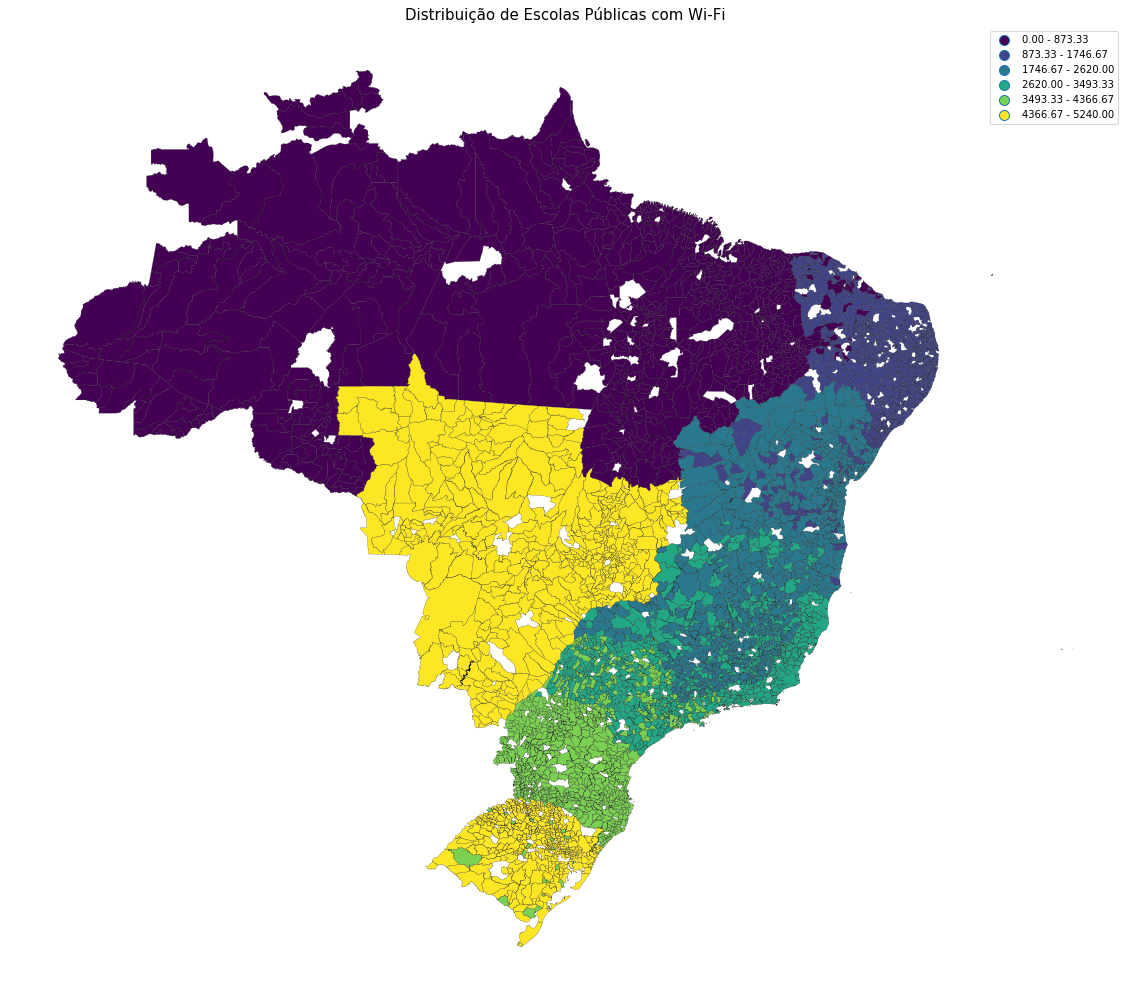

In [26]:
ax = df_plot.plot(column='CD_GEOCMU', 
                         cmap=plt.cm.get_cmap('viridis', 6), 
                         figsize=(20,20),
                         scheme='equal_interval',
                         linewidth=0.2, 
                         edgecolor='.1',
                         k=6,
                         legend=True)
ax.axis('off')
ax.set_title("Distribuição de Escolas Públicas com Wi-Fi", 
             fontdict={'fontsize': '15', 'fontweight' : '10'}, 
             loc='center');

### Velocidade dos Acessos

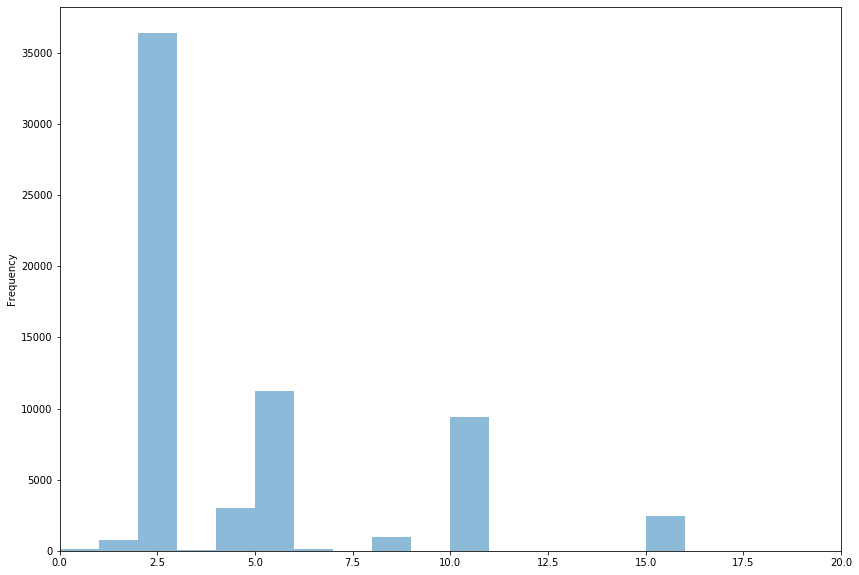

In [27]:
df['Velocidade_Acesso_Instalada'].plot.hist(bins=50,alpha=0.5, xlim=(0, 20))

In [62]:
df1 = df[df.Velocidade_Acesso_Instalada<=100]

In [63]:
df_veloc = df1.groupby(['CD_GEOCMU', 'Velocidade_Acesso_Instalada']).size().reset_index()

In [64]:
df_veloc.head()

,CD_GEOCMU,Velocidade_Acesso_Instalada,0
0,1100015,5.0,8
1,1100023,2.0,7
2,1100023,5.0,15
3,1100023,10.0,3
4,1100031,10.0,3


In [65]:
df_veloc.dtypes

CD_GEOCMU                       object
Velocidade_Acesso_Instalada    float64
0                                int64
dtype: object

### Distribuição das Velocidades por Municípios

In [66]:
df_plot_veloc = pd.merge(df_mun[['CD_GEOCMU', 'geometry']], df_veloc, on='CD_GEOCMU', how='inner')


In [67]:
df_plot_veloc.columns 

Index(['CD_GEOCMU', 'geometry', 'Velocidade_Acesso_Instalada', 0], dtype='object')

In [68]:
df_plot_veloc.rename(columns={0:'quant'},inplace=True)

In [69]:
df_plot_veloc.head()

,CD_GEOCMU,geometry,Velocidade_Acesso_Instalada,quant
0,1501956,POLYGON ((-46.31955231999996 -1.75517617399992...,2.0,4
1,1501956,POLYGON ((-46.31955231999996 -1.75517617399992...,5.0,1
2,1501956,POLYGON ((-46.31955231999996 -1.75517617399992...,10.0,1
3,2111250,POLYGON ((-44.63409231599996 -5.03497527499996...,2.0,4
4,5201454,POLYGON ((-51.14229517499996 -18.2967249689999...,15.0,2


In [70]:
velocidade = round(df_plot_veloc['Velocidade_Acesso_Instalada'])

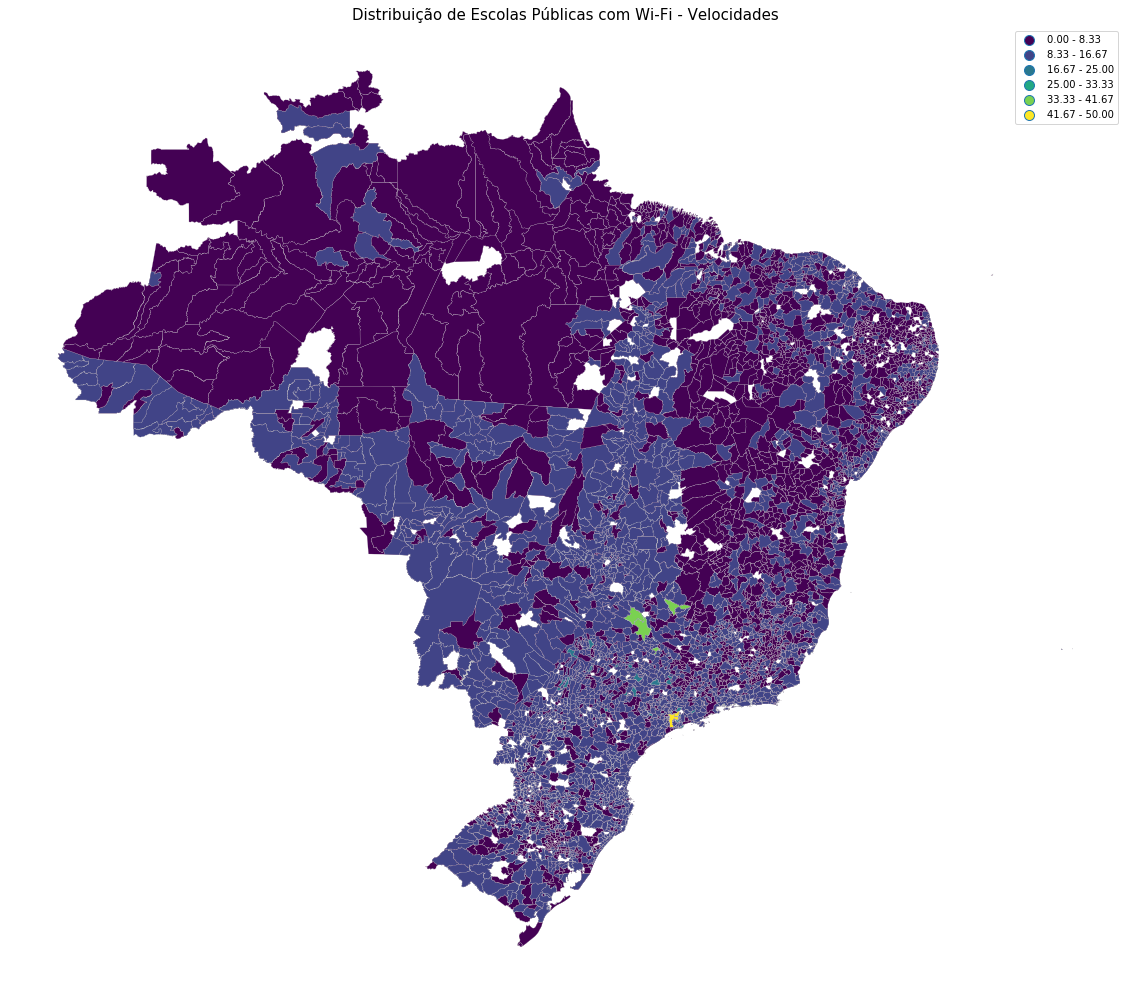

In [71]:
ax = df_plot_veloc.plot(column=velocidade, 
                         cmap=plt.cm.get_cmap('viridis', 6), 
                         figsize=(20, 20),
                         scheme='equal_interval',
                         linewidth=0.2, 
                         edgecolor='.8',                         
                         k=6,
                         legend=True)
ax.axis('off')
ax.set_title("Distribuição de Escolas Públicas com Wi-Fi - Velocidades", 
             fontdict={'fontsize': '15', 'fontweight' : '10'}, 
             loc='center');

__Observações:__
<br>
- De acordo com o mapa as maiores velocidades estão na região Centro-Oeste e no Distrito Federal, com muitos pontos espalhados pela região Sul.
- As menores velocidades em quase toda as regiões Norte, Nordeste.

### Distribuição das Tecnologias de Wi-Fi por Estados

In [72]:
df_map_tecno = df.groupby(['CD_GEOCMU', 'Tecnologia']).size().reset_index()

In [73]:
df_map_tecno.rename(columns={0:'quant'},inplace=True)

In [77]:
df_tecno =  pd.merge(df_mun[['CD_GEOCMU', 'geometry']], df_map_tecno[['CD_GEOCMU', 'Tecnologia','quant']], on='CD_GEOCMU', how='inner')

In [78]:
#df_tecno =  pd.merge(df_mun[['CD_GEOCMU', 'geometry']], df_map_tecno[['CD_GEOCMU', 'Tecnologia']], on='CD_GEOCMU', how='inner')

In [79]:
df_tecno.head()

,CD_GEOCMU,geometry,Tecnologia,quant
0,1501956,POLYGON ((-46.31955231999996 -1.75517617399992...,ADSL,5
1,1501956,POLYGON ((-46.31955231999996 -1.75517617399992...,SATÉLITE,1
2,2111250,POLYGON ((-44.63409231599996 -5.03497527499996...,ADSL,4
3,5201454,POLYGON ((-51.14229517499996 -18.2967249689999...,ADSL,2
4,5202353,POLYGON ((-51.69953044199997 -16.2326965739999...,ADSL,3


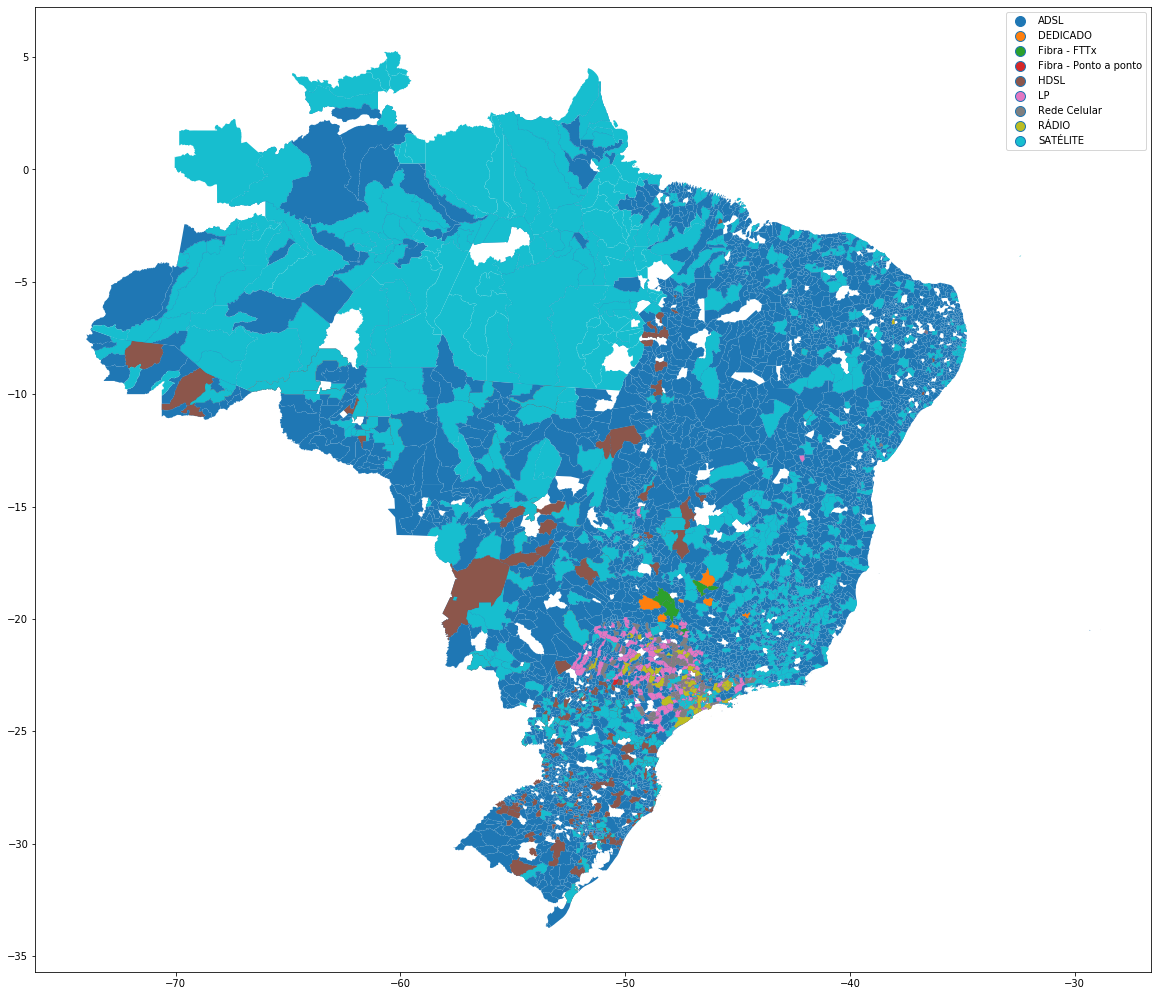

In [95]:
df_tecno.plot(column='Tecnologia', categorical=True, legend=True, figsize=(20, 20));

### Volume de Instalações por Ano - Desde 2008

In [96]:
df['Data_Ativacao'] = pd.to_datetime(df['Data_Ativacao'])

In [97]:
df['mes_ativacao'] = (pd.DatetimeIndex(df['Data_Ativacao']).month )
df['ano_ativacao'] = (pd.DatetimeIndex(df['Data_Ativacao']).year )

In [98]:
df['ano_ativacao'].sort_values(ascending=True).value_counts()

2008    20756
2009    20085
2010    10483
2011     4213
2012     3311
2017     2209
2018      984
2013      820
2016      743
2015      632
2014      419
2019       37
Name: ano_ativacao, dtype: int64

In [99]:
instalacoes = df[['ano_ativacao',  'Num_INEP']].groupby('ano_ativacao', as_index=False).count()

In [100]:
instalacoes.head(10)

,ano_ativacao,Num_INEP
0,2008,20756
1,2009,20085
2,2010,10483
3,2011,4213
4,2012,3311
5,2013,820
6,2014,419
7,2015,632
8,2016,743
9,2017,2209


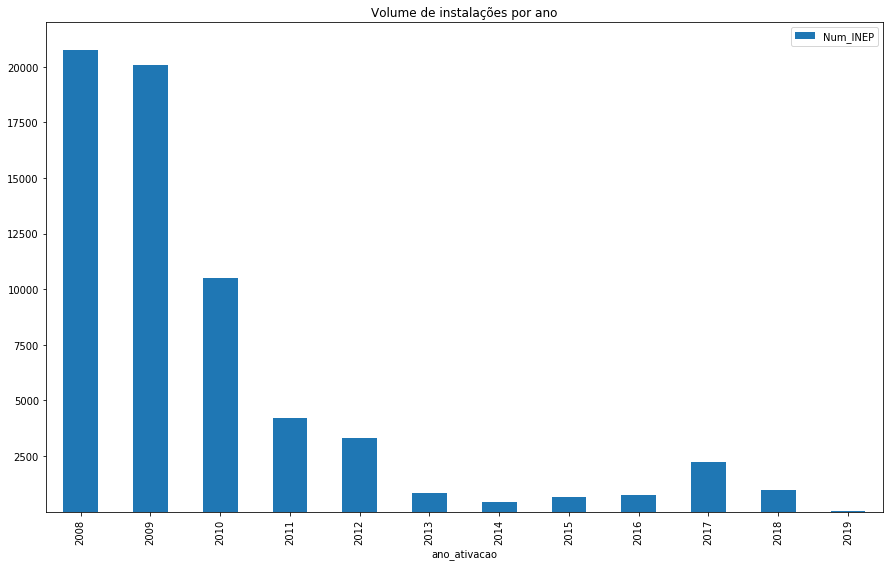

In [101]:
instalacoes.plot(kind='bar',
               x='ano_ativacao',
               y='Num_INEP',
               figsize=(15, 9),
               ylim=(1, 22000),
               title='Volume de instalações por ano')
plt.show()

__Observações:__
- É possível ver os picos de instalações no início do programa, em 2008, e a diminuição natural ao longo dos anos.

In [102]:
round(ADSL['Velocidade_Acesso_Instalada']).sort_values(ascending=True).value_counts()

2.0     31769
5.0     11064
10.0     9418
4.0      2809
15.0     2439
8.0       945
1.0       810
6.0       102
25.0       23
12.0       17
40.0       10
0.0         8
20.0        3
50.0        2
3.0         1
Name: Velocidade_Acesso_Instalada, dtype: int64

# Plotando as Médias de Velocidades por UF

In [103]:
media_uf = pd.DataFrame(df.groupby('UF')['Velocidade_Acesso_Instalada'].mean()).reset_index()

In [104]:
media_uf.head()

,UF,Velocidade_Acesso_Instalada
0,AC,6.065089
1,AL,2.987854
2,AM,2.116656
3,AP,2.578930
4,BA,3.672191


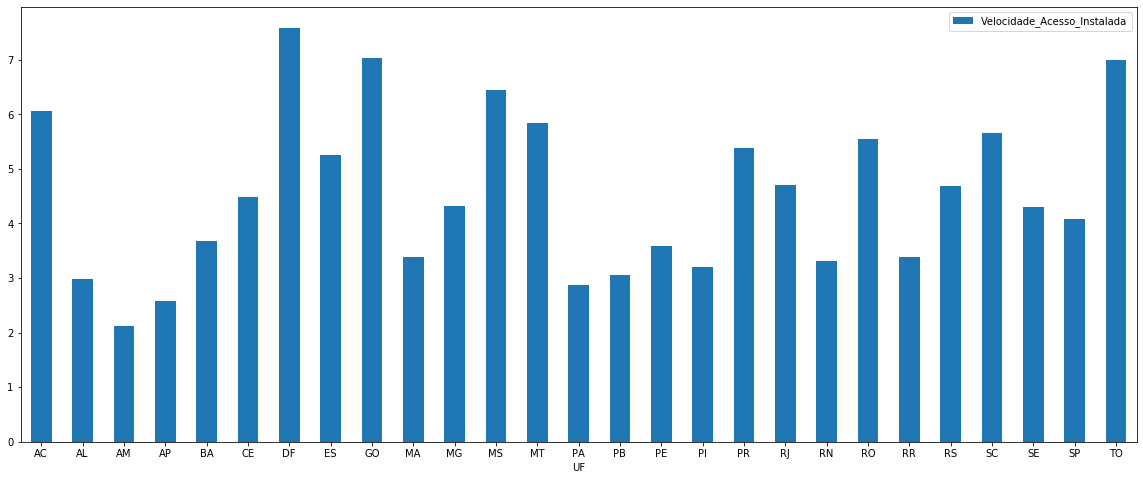

In [105]:
ax = media_uf.plot.bar(x='UF', y='Velocidade_Acesso_Instalada', rot=0, figsize=(20,8))

__Observações:__
- Esse gráfico está de acordo com o mapa plotado anteriormente e mostra as maiores velocidades no Distrito Federal e em Mato Grosso.

# Extraindo arquivo do ano de 2012, instalação do Wi-Fi, com as escolas de todos os estados do Brasil. Este arquivo será a base das análises.

In [106]:
instalacoes2012 = pd.DataFrame(df[df['ano_ativacao'] == 2012])

In [107]:
instalacoes2012.head()

,Prestadora,Num_INEP,UF,Municipio,Situacao,Tipo_Obrigacao,Velocidade_Acesso_Instalada,Tipo_velocidade,Tecnologia,Nome_Escola,Tipo_Escola,Data_Ativacao,Mes,Ano,Longitude,Latitude,CD_GEOCUF,CD_GEOCMU,mes_ativacao,ano_ativacao
26,CTBC,31033707,MG,Iguatama,Instalada,PBLE,4.0,Mbps,ADSL,EM PIO XII,Municipal,2012-08-20,3,2019,-45.7,-20.17,31,3130309,8,2012
54,CTBC,31035084,MG,Pará de Minas,Instalada,PBLE,10.0,Mbps,ADSL,CESEC DONA AFONSINA,Estadual,2012-09-14,3,2019,-44.6,-19.86,31,3147105,9,2012
59,CTBC,31035173,MG,Pará de Minas,Instalada,PBLE,6.0,Mbps,ADSL,EE ZICO FERREIRA,Estadual,2012-10-08,3,2019,-44.6,-19.86,31,3147105,10,2012
78,CTBC,31109142,MG,Vazante,Instalada,PBLE,6.0,Mbps,ADSL,ESCOLA MUNICIPAL NAIR DE MELO FRANCO RIBEIRO,Municipal,2012-08-22,3,2019,-46.9,-17.99,31,3171006,8,2012
82,CTBC,31109207,MG,Vazante,Instalada,PBLE,6.0,Mbps,ADSL,EM CALDEIRA BRANT,Municipal,2012-08-14,3,2019,-46.9,-17.99,31,3171006,8,2012


In [108]:
instalacoes2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3311 entries, 26 to 64691
Data columns (total 20 columns):
Prestadora                     3311 non-null object
Num_INEP                       3311 non-null object
UF                             3311 non-null object
Municipio                      3311 non-null object
Situacao                       3311 non-null object
Tipo_Obrigacao                 3311 non-null object
Velocidade_Acesso_Instalada    3311 non-null float64
Tipo_velocidade                3311 non-null object
Tecnologia                     3311 non-null object
Nome_Escola                    3311 non-null object
Tipo_Escola                    3311 non-null object
Data_Ativacao                  3311 non-null datetime64[ns]
Mes                            3311 non-null int64
Ano                            3311 non-null int64
Longitude                      3311 non-null object
Latitude                       3311 non-null object
CD_GEOCUF                      3311 non-null object


In [109]:
df['Longitude'] = df['Longitude'].astype(str)
df['Latitude'] = df['Latitude'].astype(str)

In [110]:
instalacoes2012['UF'].sort_values(ascending=True).value_counts()

SP    1922
PA     329
PR     197
AM     178
MG      76
BA      62
SC      60
PE      51
RS      46
GO      44
MA      38
MT      37
CE      33
PI      30
AP      30
DF      29
RR      26
ES      18
RJ      18
RO      18
MS      15
AC      12
SE      10
RN       9
AL       9
TO       8
PB       6
Name: UF, dtype: int64

In [111]:
instalacoes2012.to_csv('Instalacoes-2012.csv', index=False)